In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [17]:
pasajeros = pd.read_excel('pasajeros_metrorrey.xlsx', index_col='fecha', parse_dates=True)
pasajeros.index.freq = 'MS'

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(pasajeros['pasajeros'], model='mul')

In [20]:
pasajeros_deses = pasajeros['pasajeros']/results.seasonal

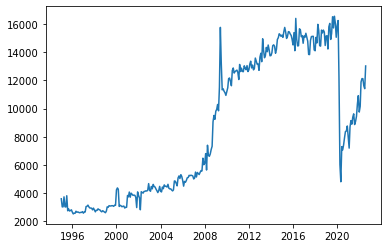

In [28]:
plt.plot(pasajeros_deses)

## Determinar si la serie es estacionaria

In [25]:
result_adf = adfuller(pasajeros_deses)

In [26]:
alpha = .05
if result_adf[1]<alpha:
    print(f'La serie es estacionaria, con p-value{result_adf[1]}')
else:
    print(f'La serie es no estacionaria, con p-value{result_adf[1]}')

La serie es no estacionaria, con p-value0.6722241481974909


## Hacerla estacionaria

In [30]:
pasajeros_deses_difer = pasajeros_deses.diff()

In [39]:
result_adf = adfuller(pasajeros_deses_difer.dropna())

alpha=0.05
if result_adf[1] < alpha:
    print("Se rechaza Ho, la serie es estacionaria")
else:
    printnt("No se rechaza Ho, la serie es no estacionaria")

Se rechaza Ho, la serie es estacionaria


## ACF y PACF

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


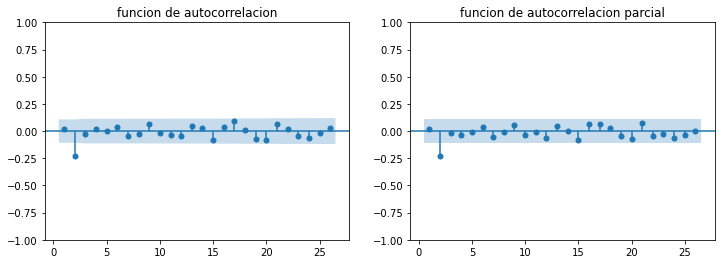

In [40]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

plot_acf(pasajeros_deses_difer.dropna(), zero=False, ax= ax[0], title='funcion de autocorrelacion')
ax[0].set_ylim(-1,1)

plot_pacf(pasajeros_deses_difer.dropna(), zero=False, ax= ax[1], title='funcion de autocorrelacion parcial')
ax[1].set_ylim(-1,1)

plt.show()

## Evaluar 5 candidatos respecto a su AIC

debido a que los correlogramas no nos ayudan a distingir que tipo de proceso sigue buscaremos los 5 candidatos mas adecuados y compararemos su AIC. Candidatos:
AR(2), MA(2), ARMA(2,2), ARMA(3,3), AR(3)

In [42]:
from statsmodels.tsa.arima.model import ARIMA 

In [44]:
model = ARIMA(pasajeros_deses_difer.dropna(), order=(2,0,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  331
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2645.249
Date:                Tue, 01 Nov 2022   AIC                           5302.498
Time:                        16:15:19   BIC                           5325.311
Sample:                    02-01-1995   HQIC                          5311.597
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5296     33.641      0.848      0.396     -37.406      94.465
ar.L1          0.0988      0.215      0.460      0.646      -0.322       0.520
ar.L2         -0.1277      0.242     -0.528      0.598      -0.602       0.346
ma.L1         -0.0748      0.222     -0.336      0.737      -0.511       0.361
ma.L2         -0.1110      0.250     -0.444      0.657      -0.601       0.379
sigma2       5.15e+05   1.81e+04     28.444      0.000     4.8e+05    5.51e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5966.20
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.75   Skew:                            -1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
model = ARIMA(pasajeros_deses_difer.dropna(), order=(2,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  331
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2645.421
Date:                Tue, 01 Nov 2022   AIC                           5298.842
Time:                        16:16:03   BIC                           5314.051
Sample:                    02-01-1995   HQIC                          5304.908
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5296     35.081      0.813      0.416     -40.228      97.287
ar.L1          0.0278      0.023      1.189      0.235      -0.018       0.074
ar.L2         -0.2310      0.039     -5.942      0.000      -0.307      -0.155
sigma2      5.141e+05   1.74e+04     29.515      0.000     4.8e+05    5.48e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5723.90
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               7.74   Skew:                            -1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
model = ARIMA(pasajeros_deses_difer.dropna(), order=(0,0,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  331
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -2645.542
Date:                Tue, 01 Nov 2022   AIC                           5299.084
Time:                        16:16:33   BIC                           5314.293
Sample:                    02-01-1995   HQIC                          5305.150
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5296     33.499      0.852      0.394     -37.126      94.186
ma.L1          0.0159      0.025      0.626      0.531      -0.034       0.066
ma.L2         -0.2274      0.041     -5.555      0.000      -0.308      -0.147
sigma2      5.163e+05   1.74e+04     29.599      0.000    4.82e+05     5.5e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              6319.77
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               7.76   Skew:                            -1.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
model = ARIMA(pasajeros_deses_difer.dropna(), order=(3,0,3))
results = model.fit()
results.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  331
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -2643.477
Date:                Tue, 01 Nov 2022   AIC                           5302.953
Time:                        16:26:40   BIC                           5333.370
Sample:                    02-01-1995   HQIC                          5315.085
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5253     34.812      0.819      0.413     -39.705      96.756
ar.L1         -0.8279      0.225     -3.687      0.000      -1.268      -0.388
ar.L2         -0.0250      0.319     -0.078      0.937      -0.650       0.600
ar.L3          0.4589      0.232      1.975      0.048       0.004       0.914
ma.L1          0.8390      0.215      3.906      0.000       0.418       1.260
ma.L2         -0.1528      0.317     -0.482      0.630      -0.773       0.468
ma.L3         -0.6380      0.216     -2.952      0.003      -1.062      -0.214
sigma2      5.186e+05   1.83e+04     28.275      0.000    4.83e+05    5.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              7501.61
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               7.41   Skew:                            -1.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
model = ARIMA(pasajeros_deses_difer.dropna(), order=(0,0,3))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  331
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -2645.413
Date:                Tue, 01 Nov 2022   AIC                           5300.825
Time:                        16:27:37   BIC                           5319.836
Sample:                    02-01-1995   HQIC                          5308.407
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5296     32.965      0.865      0.387     -36.081      93.140
ma.L1          0.0250      0.026      0.968      0.333      -0.026       0.076
ma.L2         -0.2286      0.043     -5.342      0.000      -0.313      -0.145
ma.L3         -0.0303      0.051     -0.599      0.549      -0.130       0.069
sigma2      5.211e+05   1.78e+04     29.217      0.000    4.86e+05    5.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6084.51
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.74   Skew:                            -1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Candidato	AIC
AR(2)	5299.084
AR(3)	5300.82
MA(2)	5298.84
ARMA(2,2)	5302.498
Arma(3,3)	5302.953
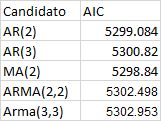


## Por lo tanto, la serie de pasajeros sigue una serie MA(2)
$Y_t= 28.52 + 0.02\varepsilon_{t-1} - 0.23\varepsilon_{t-2} + \varepsilon_t $